# EXPLORAÇÃO INICIAL

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
pd.set_option('display.max_columns', None)



In [41]:
# Lê o arquivo CSV e carrega o DataFrame
file_path = "/content/drive/MyDrive/Colab Notebooks/olx/final_dataframe.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()

,TITLE,LINK,DATE_SCRAPE,CITY,CEP,NEIGHBORHOOD,CONDO,TAX,AREA,ROOMS_NO,BATH_NO,PARKING_SPOTS,APARTMENT_DETAILS,PRICE,REGION
0,Apartamento 03 quartos,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30662050,Tirol (Barreiro),R$ 350,R$ 120,67m²,3,2,1,"Área de serviço, Armários na cozinha, Armários...",260000.0,barreiro
1,Apto,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30620250,Milionários (Barreiro),R$ 250,R$ 0,66m²,3,1,1,"Área de serviço, Armários na cozinha, Armários...",239990.0,barreiro
2,"Apartamento à venda - Barreiro, 2 quartos - Be...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30640150,Barreiro,R$ 300,R$ 2.402,56m²,2,1,1,Área de serviço,310000.0,barreiro
3,"Apartamento à Venda - Palmares, 3 Quartos, 85 m2",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,31155292,Santa Cruz,R$ 900,R$ 270,85m²,3,2,2,"Churrasqueira, Piscina",620000.0,barreiro
4,"Apartamento 02 quartos, 01 vaga à venda no Bai...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30620070,Milionários (Barreiro),R$ 290,R$ 400,47m²,2,1,1,"Área de serviço, Mobiliado",209900.0,barreiro


In [ ]:
# Função para substituir NaN por 0 nas colunas especificadas
def replace_nan_with_zero(data, column_names):
    data_copy = data.copy()
    for col in column_names:
        data_copy[col] = data_copy[col].fillna(0)
    return data_copy

# Função encapsulada para o pipeline
def replace_nan_in_condo_and_tax(data):
    return replace_nan_with_zero(data, ['CONDO', 'TAX'])

# Atualizando o pipeline para incluir a substituição de NaN por 0
transformation_pipeline_with_nan_replacement = Pipeline(steps=[
    ('transform_condo', FunctionTransformer(func=transform_condo_column_final, validate=False)),
    ('transform_tax', FunctionTransformer(func=transform_tax_column_final, validate=False)),
    ('replace_nan', FunctionTransformer(func=replace_nan_in_condo_and_tax, validate=False))
])

# Testando o pipeline atualizado
df_transformed_with_nan_replacement = transformation_pipeline_with_nan_replacement.transform(df)
df_transformed_with_nan_replacement[['CONDO', 'TAX']].head()


,CONDO,TAX
0,350.0,120.0
1,250.0,0.0
2,300.0,2402.0
3,900.0,270.0
4,290.0,400.0


In [ ]:
df_transformed_final.head()

,TITLE,LINK,DATE_SCRAPE,CITY,CEP,NEIGHBORHOOD,CONDO,TAX,AREA,ROOMS_NO,BATH_NO,PARKING_SPOTS,APARTMENT_DETAILS,PRICE,REGION
0,Apartamento 03 quartos,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30662050,Tirol (Barreiro),350.0,120.0,67m²,3,2,1,"Área de serviço, Armários na cozinha, Armários...",260000.0,barreiro
1,Apto,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30620250,Milionários (Barreiro),250.0,0.0,66m²,3,1,1,"Área de serviço, Armários na cozinha, Armários...",239990.0,barreiro
2,"Apartamento à venda - Barreiro, 2 quartos - Be...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30640150,Barreiro,300.0,2402.0,56m²,2,1,1,Área de serviço,310000.0,barreiro
3,"Apartamento à Venda - Palmares, 3 Quartos, 85 m2",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,31155292,Santa Cruz,900.0,270.0,85m²,3,2,2,"Churrasqueira, Piscina",620000.0,barreiro
4,"Apartamento 02 quartos, 01 vaga à venda no Bai...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30620070,Milionários (Barreiro),290.0,400.0,47m²,2,1,1,"Área de serviço, Mobiliado",209900.0,barreiro


In [ ]:
# Função para remover linhas onde AREA é 0
def drop_rows_with_zero_area(data):
    return data[data['AREA'] != 0]

# Atualizando o pipeline para incluir a remoção de linhas com AREA = 0
transformation_pipeline_with_drop = Pipeline(steps=[
    ('transform_condo', FunctionTransformer(func=transform_condo_column_final, validate=False)),
    ('transform_tax', FunctionTransformer(func=transform_tax_column_final, validate=False)),
    ('replace_nan', FunctionTransformer(func=replace_nan_in_condo_and_tax, validate=False)),
    ('transform_area', FunctionTransformer(func=transform_area_column_updated, validate=False)),
    ('drop_zero_area', FunctionTransformer(func=drop_rows_with_zero_area, validate=False))
])

# Testando o pipeline atualizado
df_transformed_with_drop = transformation_pipeline_with_drop.transform(df)
df_transformed_with_drop[['CONDO', 'TAX', 'AREA']].head()


,CONDO,TAX,AREA
0,350.0,120.0,67.0
1,250.0,0.0,66.0
2,300.0,2402.0,56.0
3,900.0,270.0,85.0
4,290.0,400.0,47.0


In [ ]:
# Função para remover linhas onde AREA é NaN
def drop_rows_with_nan_area(data):
    return data.dropna(subset=['AREA'])

# Atualizando o pipeline para incluir a remoção de linhas com AREA = NaN
transformation_pipeline_with_nan_area_drop = Pipeline(steps=[
    ('transform_condo', FunctionTransformer(func=transform_condo_column_final, validate=False)),
    ('transform_tax', FunctionTransformer(func=transform_tax_column_final, validate=False)),
    ('replace_nan', FunctionTransformer(func=replace_nan_in_condo_and_tax, validate=False)),
    ('transform_area', FunctionTransformer(func=transform_area_column_updated, validate=False)),
    ('drop_nan_area', FunctionTransformer(func=drop_rows_with_nan_area, validate=False))
])

# Testando o pipeline atualizado
df_transformed_with_nan_area_drop = transformation_pipeline_with_nan_area_drop.transform(df)
df_transformed_with_nan_area_drop[['CONDO', 'TAX', 'AREA']].head()


,CONDO,TAX,AREA
0,350.0,120.0,67.0
1,250.0,0.0,66.0
2,300.0,2402.0,56.0
3,900.0,270.0,85.0
4,290.0,400.0,47.0


In [ ]:
# Atualizando a função para tratar valores inadequados na coluna BATH_NO
def transform_bath_no_column_updated(data):
    data_copy = data.copy()

    # Substituindo '5 ou mais' por '5'
    data_copy['BATH_NO'] = data_copy['BATH_NO'].replace('5 ou mais', '5')

    # Tentando converter para int e substituindo valores inválidos por NaN
    data_copy['BATH_NO'] = pd.to_numeric(data_copy['BATH_NO'], errors='coerce', downcast='integer')

    return data_copy

# Atualizando o pipeline para incluir a transformação da coluna BATH_NO
transformation_pipeline_with_bath_no_updated = Pipeline(steps=[
    ('transform_condo', FunctionTransformer(func=transform_condo_column_final, validate=False)),
    ('transform_tax', FunctionTransformer(func=transform_tax_column_final, validate=False)),
    ('replace_nan', FunctionTransformer(func=replace_nan_in_condo_and_tax, validate=False)),
    ('transform_area', FunctionTransformer(func=transform_area_column_updated, validate=False)),
    ('drop_nan_area', FunctionTransformer(func=drop_rows_with_nan_area, validate=False)),
    ('transform_bath_no', FunctionTransformer(func=transform_bath_no_column_updated, validate=False))
])

# Testando o pipeline atualizado
df_transformed_with_bath_no_updated = transformation_pipeline_with_bath_no_updated.transform(df)
df_transformed_with_bath_no_updated['BATH_NO'].unique()


array([ 2.,  1.,  3.,  4., nan,  5.,  0.])

In [ ]:
# Função para remover linhas onde BATH_NO é NaN
def drop_rows_with_nan_bath_no(data):
    return data.dropna(subset=['BATH_NO'])

# Atualizando o pipeline para incluir a remoção de linhas com BATH_NO = NaN
transformation_pipeline_with_nan_bath_no_drop = Pipeline(steps=[
    ('transform_condo', FunctionTransformer(func=transform_condo_column_final, validate=False)),
    ('transform_tax', FunctionTransformer(func=transform_tax_column_final, validate=False)),
    ('replace_nan', FunctionTransformer(func=replace_nan_in_condo_and_tax, validate=False)),
    ('transform_area', FunctionTransformer(func=transform_area_column_updated, validate=False)),
    ('drop_nan_area', FunctionTransformer(func=drop_rows_with_nan_area, validate=False)),
    ('transform_bath_no', FunctionTransformer(func=transform_bath_no_column_updated, validate=False)),
    ('drop_nan_bath_no', FunctionTransformer(func=drop_rows_with_nan_bath_no, validate=False))
])

# Testando o pipeline atualizado
df_transformed_with_nan_bath_no_drop = transformation_pipeline_with_nan_bath_no_drop.transform(df)
df_transformed_with_nan_bath_no_drop['BATH_NO'].unique()


array([2., 1., 3., 4., 5., 0.])

In [ ]:
# Função para tratar a coluna PARKING_SPOTS
def transform_parking_spots_column(data):
    data_copy = data.copy()

    # Substituindo '5 ou mais' por '5'
    data_copy['PARKING_SPOTS'] = data_copy['PARKING_SPOTS'].replace('5 ou mais', '5')

    # Tentando converter para int e substituindo valores inválidos por NaN
    data_copy['PARKING_SPOTS'] = pd.to_numeric(data_copy['PARKING_SPOTS'], errors='coerce', downcast='integer')

    return data_copy

# Função para remover linhas onde PARKING_SPOTS é NaN
def drop_rows_with_nan_parking_spots(data):
    return data.dropna(subset=['PARKING_SPOTS'])

# Atualizando o pipeline para incluir as transformações na coluna PARKING_SPOTS
transformation_pipeline_with_parking_spots = Pipeline(steps=[
    ('transform_condo', FunctionTransformer(func=transform_condo_column_final, validate=False)),
    ('transform_tax', FunctionTransformer(func=transform_tax_column_final, validate=False)),
    ('replace_nan', FunctionTransformer(func=replace_nan_in_condo_and_tax, validate=False)),
    ('transform_area', FunctionTransformer(func=transform_area_column_updated, validate=False)),
    ('drop_nan_area', FunctionTransformer(func=drop_rows_with_nan_area, validate=False)),
    ('transform_bath_no', FunctionTransformer(func=transform_bath_no_column_updated, validate=False)),
    ('drop_nan_bath_no', FunctionTransformer(func=drop_rows_with_nan_bath_no, validate=False)),
    ('transform_parking_spots', FunctionTransformer(func=transform_parking_spots_column, validate=False)),
    ('drop_nan_parking_spots', FunctionTransformer(func=drop_rows_with_nan_parking_spots, validate=False))
])

# Testando o pipeline atualizado
df_transformed_with_parking_spots = transformation_pipeline_with_parking_spots.transform(df)
df_transformed_with_parking_spots['PARKING_SPOTS'].unique()


array([1., 2., 4., 0., 3., 5.])

In [ ]:
# Função para tratar a coluna ROOMS_NO
def transform_rooms_no_column(data):
    data_copy = data.copy()

    # Substituindo '5 ou mais' por '5'
    data_copy['ROOMS_NO'] = data_copy['ROOMS_NO'].replace('5 ou mais', '5')

    # Tentando converter para int e substituindo valores inválidos por NaN
    data_copy['ROOMS_NO'] = pd.to_numeric(data_copy['ROOMS_NO'], errors='coerce', downcast='integer')

    return data_copy

# Função para remover linhas onde ROOMS_NO é NaN
def drop_rows_with_nan_rooms_no(data):
    return data.dropna(subset=['ROOMS_NO'])

# Atualizando o pipeline para incluir as transformações na coluna ROOMS_NO
transformation_pipeline_with_rooms_no = Pipeline(steps=[
    ('transform_condo', FunctionTransformer(func=transform_condo_column_final, validate=False)),
    ('transform_tax', FunctionTransformer(func=transform_tax_column_final, validate=False)),
    ('replace_nan', FunctionTransformer(func=replace_nan_in_condo_and_tax, validate=False)),
    ('transform_area', FunctionTransformer(func=transform_area_column_updated, validate=False)),
    ('drop_nan_area', FunctionTransformer(func=drop_rows_with_nan_area, validate=False)),
    ('transform_bath_no', FunctionTransformer(func=transform_bath_no_column_updated, validate=False)),
    ('drop_nan_bath_no', FunctionTransformer(func=drop_rows_with_nan_bath_no, validate=False)),
    ('transform_parking_spots', FunctionTransformer(func=transform_parking_spots_column, validate=False)),
    ('drop_nan_parking_spots', FunctionTransformer(func=drop_rows_with_nan_parking_spots, validate=False)),
    ('transform_rooms_no', FunctionTransformer(func=transform_rooms_no_column, validate=False)),
    ('drop_nan_rooms_no', FunctionTransformer(func=drop_rows_with_nan_rooms_no, validate=False))
])

# Testando o pipeline atualizado
df_transformed_with_rooms_no = transformation_pipeline_with_rooms_no.transform(df)
df_transformed_with_rooms_no['ROOMS_NO'].unique()


array([3, 2, 4, 1, 5, 0], dtype=int8)

In [ ]:
def create_apartment_details_dummies(data):
    data_copy = data.copy()

    # Removendo espaços em branco entre as vírgulas
    data_copy['APARTMENT_DETAILS'] = data_copy['APARTMENT_DETAILS'].apply(lambda x: ','.join(item.strip() for item in x.split(',')) if isinstance(x, str) else x)

    # Criando variáveis dummy para cada detalhe do apartamento
    dummies = data_copy['APARTMENT_DETAILS'].str.get_dummies(sep=',')

    # Renomeando as colunas das dummies
    dummies = dummies.rename(lambda x: 'DETAIL_' + x, axis='columns')

    # Concatenando o dataframe original com as colunas dummy
    data_copy = pd.concat([data_copy, dummies], axis=1)

    return data_copy

# Atualizando o pipeline para incluir a criação de dummies da coluna APARTMENT_DETAILS
transformation_pipeline_with_details_dummies = Pipeline(steps=[
    ('transform_condo', FunctionTransformer(func=transform_condo_column_final, validate=False)),
    ('transform_tax', FunctionTransformer(func=transform_tax_column_final, validate=False)),
    ('replace_nan', FunctionTransformer(func=replace_nan_in_condo_and_tax, validate=False)),
    ('transform_area', FunctionTransformer(func=transform_area_column_updated, validate=False)),
    ('drop_nan_area', FunctionTransformer(func=drop_rows_with_nan_area, validate=False)),
    ('transform_bath_no', FunctionTransformer(func=transform_bath_no_column_updated, validate=False)),
    ('drop_nan_bath_no', FunctionTransformer(func=drop_rows_with_nan_bath_no, validate=False)),
    ('transform_parking_spots', FunctionTransformer(func=transform_parking_spots_column, validate=False)),
    ('drop_nan_parking_spots', FunctionTransformer(func=drop_rows_with_nan_parking_spots, validate=False)),
    ('transform_rooms_no', FunctionTransformer(func=transform_rooms_no_column, validate=False)),
    ('drop_nan_rooms_no', FunctionTransformer(func=drop_rows_with_nan_rooms_no, validate=False)),
    ('details_dummies', FunctionTransformer(func=create_apartment_details_dummies, validate=False))
])

# Testando o pipeline atualizado
df_transformed_with_details_dummies = transformation_pipeline_with_details_dummies.transform(df)
df_transformed_with_details_dummies.filter(like="DETAIL_").head()


,DETAIL_Academia,DETAIL_Ar condicionado,DETAIL_Armários na cozinha,DETAIL_Armários no quarto,DETAIL_Churrasqueira,DETAIL_Mobiliado,DETAIL_Piscina,DETAIL_Quarto de serviço,DETAIL_Varanda,DETAIL_Área de serviço
0,0,0,1,1,0,0,0,0,0,1
1,0,0,1,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,1


In [ ]:
df_transformed_with_details_dummies.head()

,TITLE,LINK,DATE_SCRAPE,CITY,CEP,NEIGHBORHOOD,CONDO,TAX,AREA,ROOMS_NO,BATH_NO,PARKING_SPOTS,APARTMENT_DETAILS,PRICE,REGION,DETAIL_Academia,DETAIL_Ar condicionado,DETAIL_Armários na cozinha,DETAIL_Armários no quarto,DETAIL_Churrasqueira,DETAIL_Mobiliado,DETAIL_Piscina,DETAIL_Quarto de serviço,DETAIL_Varanda,DETAIL_Área de serviço
0,Apartamento 03 quartos,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30662050,Tirol (Barreiro),350.0,120.0,67.0,3,2.0,1.0,"Área de serviço,Armários na cozinha,Armários n...",260000.0,barreiro,0,0,1,1,0,0,0,0,0,1
1,Apto,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30620250,Milionários (Barreiro),250.0,0.0,66.0,3,1.0,1.0,"Área de serviço,Armários na cozinha,Armários n...",239990.0,barreiro,0,0,1,1,0,0,0,0,0,1
2,"Apartamento à venda - Barreiro, 2 quartos - Be...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30640150,Barreiro,300.0,2402.0,56.0,2,1.0,1.0,Área de serviço,310000.0,barreiro,0,0,0,0,0,0,0,0,0,1
3,"Apartamento à Venda - Palmares, 3 Quartos, 85 m2",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,31155292,Santa Cruz,900.0,270.0,85.0,3,2.0,2.0,"Churrasqueira,Piscina",620000.0,barreiro,0,0,0,0,1,0,1,0,0,0
4,"Apartamento 02 quartos, 01 vaga à venda no Bai...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30620070,Milionários (Barreiro),290.0,400.0,47.0,2,1.0,1.0,"Área de serviço,Mobiliado",209900.0,barreiro,0,0,0,0,0,1,0,0,0,1


In [ ]:
def drop_duplicated_rows(data):
    return data.drop_duplicates()

def drop_duplicated_links(data):
    return data.drop_duplicates(subset=['LINK'])

# Atualizando o pipeline para incluir a remoção de linhas duplicadas e links duplicados
transformation_pipeline_with_deduplication = Pipeline(steps=[
    ('transform_condo', FunctionTransformer(func=transform_condo_column_final, validate=False)),
    ('transform_tax', FunctionTransformer(func=transform_tax_column_final, validate=False)),
    ('replace_nan', FunctionTransformer(func=replace_nan_in_condo_and_tax, validate=False)),
    ('transform_area', FunctionTransformer(func=transform_area_column_updated, validate=False)),
    ('drop_nan_area', FunctionTransformer(func=drop_rows_with_nan_area, validate=False)),
    ('transform_bath_no', FunctionTransformer(func=transform_bath_no_column_updated, validate=False)),
    ('drop_nan_bath_no', FunctionTransformer(func=drop_rows_with_nan_bath_no, validate=False)),
    ('transform_parking_spots', FunctionTransformer(func=transform_parking_spots_column, validate=False)),
    ('drop_nan_parking_spots', FunctionTransformer(func=drop_rows_with_nan_parking_spots, validate=False)),
    ('transform_rooms_no', FunctionTransformer(func=transform_rooms_no_column, validate=False)),
    ('drop_nan_rooms_no', FunctionTransformer(func=drop_rows_with_nan_rooms_no, validate=False)),
    ('details_dummies', FunctionTransformer(func=create_apartment_details_dummies, validate=False)),
    ('drop_duplicates', FunctionTransformer(func=drop_duplicated_rows, validate=False)),
    ('drop_duplicate_links', FunctionTransformer(func=drop_duplicated_links, validate=False))
])

# Testando o pipeline atualizado
df_transformed_with_deduplication = transformation_pipeline_with_deduplication.transform(df)
df_transformed_with_deduplication.shape


(19934, 25)

In [ ]:
def drop_zero_values_in_columns(data):
    filtered_data = data[(data['ROOMS_NO'] != 0) & (data['AREA'] != 0) & (data['PRICE'] != 0) & (data['BATH_NO'] != 0)]
    return filtered_data

# Atualizando o pipeline para incluir a remoção de linhas com ROOMS_NO, AREA ou PRICE = 0
transformation_pipeline_with_zero_value_drop = Pipeline(steps=[
    ('transform_condo', FunctionTransformer(func=transform_condo_column_final, validate=False)),
    ('transform_tax', FunctionTransformer(func=transform_tax_column_final, validate=False)),
    ('replace_nan', FunctionTransformer(func=replace_nan_in_condo_and_tax, validate=False)),
    ('transform_area', FunctionTransformer(func=transform_area_column_updated, validate=False)),
    ('drop_nan_area', FunctionTransformer(func=drop_rows_with_nan_area, validate=False)),
    ('transform_bath_no', FunctionTransformer(func=transform_bath_no_column_updated, validate=False)),
    ('drop_nan_bath_no', FunctionTransformer(func=drop_rows_with_nan_bath_no, validate=False)),
    ('transform_parking_spots', FunctionTransformer(func=transform_parking_spots_column, validate=False)),
    ('drop_nan_parking_spots', FunctionTransformer(func=drop_rows_with_nan_parking_spots, validate=False)),
    ('transform_rooms_no', FunctionTransformer(func=transform_rooms_no_column, validate=False)),
    ('drop_nan_rooms_no', FunctionTransformer(func=drop_rows_with_nan_rooms_no, validate=False)),
    ('details_dummies', FunctionTransformer(func=create_apartment_details_dummies, validate=False)),
    ('drop_duplicates', FunctionTransformer(func=drop_duplicated_rows, validate=False)),
    ('drop_duplicate_links', FunctionTransformer(func=drop_duplicated_links, validate=False)),
    ('drop_zero_values', FunctionTransformer(func=drop_zero_values_in_columns, validate=False))
])

# Testando o pipeline atualizado
df_transformed_with_zero_value_drop = transformation_pipeline_with_zero_value_drop.transform(df)
df_transformed_with_zero_value_drop.shape


(19922, 25)

In [ ]:
def drop_low_price_values(data):
    return data[data['PRICE'] >= 50000]

# Atualizando o pipeline para incluir a remoção de linhas com PRICE < 50.000
transformation_pipeline_with_price_drop = Pipeline(steps=[
    ('transform_condo', FunctionTransformer(func=transform_condo_column_final, validate=False)),
    ('transform_tax', FunctionTransformer(func=transform_tax_column_final, validate=False)),
    ('replace_nan', FunctionTransformer(func=replace_nan_in_condo_and_tax, validate=False)),
    ('transform_area', FunctionTransformer(func=transform_area_column_updated, validate=False)),
    ('drop_nan_area', FunctionTransformer(func=drop_rows_with_nan_area, validate=False)),
    ('transform_bath_no', FunctionTransformer(func=transform_bath_no_column_updated, validate=False)),
    ('drop_nan_bath_no', FunctionTransformer(func=drop_rows_with_nan_bath_no, validate=False)),
    ('transform_parking_spots', FunctionTransformer(func=transform_parking_spots_column, validate=False)),
    ('drop_nan_parking_spots', FunctionTransformer(func=drop_rows_with_nan_parking_spots, validate=False)),
    ('transform_rooms_no', FunctionTransformer(func=transform_rooms_no_column, validate=False)),
    ('drop_nan_rooms_no', FunctionTransformer(func=drop_rows_with_nan_rooms_no, validate=False)),
    ('details_dummies', FunctionTransformer(func=create_apartment_details_dummies, validate=False)),
    ('drop_duplicates', FunctionTransformer(func=drop_duplicated_rows, validate=False)),
    ('drop_duplicate_links', FunctionTransformer(func=drop_duplicated_links, validate=False)),
    ('drop_zero_values', FunctionTransformer(func=drop_zero_values_in_columns, validate=False)),
    ('drop_low_price', FunctionTransformer(func=drop_low_price_values, validate=False))
])

# Testando o pipeline atualizado
df_transformed_with_price_drop = transformation_pipeline_with_price_drop.transform(df)
df_transformed_with_price_drop.shape


(19912, 25)

In [ ]:
def drop_high_price_values(data):
    return data[data['PRICE'] <= 5000000]

# Atualizando o pipeline para incluir a remoção de linhas com PRICE > 5.000.000
transformation_pipeline_with_high_price_drop = Pipeline(steps=[
    ('transform_condo', FunctionTransformer(func=transform_condo_column_final, validate=False)),
    ('transform_tax', FunctionTransformer(func=transform_tax_column_final, validate=False)),
    ('replace_nan', FunctionTransformer(func=replace_nan_in_condo_and_tax, validate=False)),
    ('transform_area', FunctionTransformer(func=transform_area_column_updated, validate=False)),
    ('drop_nan_area', FunctionTransformer(func=drop_rows_with_nan_area, validate=False)),
    ('transform_bath_no', FunctionTransformer(func=transform_bath_no_column_updated, validate=False)),
    ('drop_nan_bath_no', FunctionTransformer(func=drop_rows_with_nan_bath_no, validate=False)),
    ('transform_parking_spots', FunctionTransformer(func=transform_parking_spots_column, validate=False)),
    ('drop_nan_parking_spots', FunctionTransformer(func=drop_rows_with_nan_parking_spots, validate=False)),
    ('transform_rooms_no', FunctionTransformer(func=transform_rooms_no_column, validate=False)),
    ('drop_nan_rooms_no', FunctionTransformer(func=drop_rows_with_nan_rooms_no, validate=False)),
    ('details_dummies', FunctionTransformer(func=create_apartment_details_dummies, validate=False)),
    ('drop_duplicates', FunctionTransformer(func=drop_duplicated_rows, validate=False)),
    ('drop_duplicate_links', FunctionTransformer(func=drop_duplicated_links, validate=False)),
    ('drop_zero_values', FunctionTransformer(func=drop_zero_values_in_columns, validate=False)),
    ('drop_low_price', FunctionTransformer(func=drop_low_price_values, validate=False)),
    ('drop_high_price', FunctionTransformer(func=drop_high_price_values, validate=False))
])

# Testando o pipeline atualizado
df_transformed_with_high_price_drop = transformation_pipeline_with_high_price_drop.transform(df)
df_transformed_with_high_price_drop.shape


(19875, 25)

In [ ]:
def compute_avg_price_per_sqmt_by_region(data):
    data_copy = data.copy()

    # Calculando o preço médio por m² para cada bairro usando a coluna REGION
    avg_price_per_sqmt_by_region = data_copy.groupby('REGION').apply(lambda x: x['PRICE'].sum() / x['AREA'].sum()).to_dict()

    # Mapeando os valores médios para os registros no conjunto de dados
    data_copy['AVG_PRICE_PER_SQMT_BY_REGION'] = data_copy['REGION'].map(avg_price_per_sqmt_by_region)

    return data_copy

# Atualizando o pipeline para incluir o cálculo do preço médio por m² usando a coluna REGION
final_transformation_pipeline = Pipeline(steps=[
    ('transform_condo', FunctionTransformer(func=transform_condo_column_final, validate=False)),
    ('transform_tax', FunctionTransformer(func=transform_tax_column_final, validate=False)),
    ('replace_nan', FunctionTransformer(func=replace_nan_in_condo_and_tax, validate=False)),
    ('transform_area', FunctionTransformer(func=transform_area_column_updated, validate=False)),
    ('drop_nan_area', FunctionTransformer(func=drop_rows_with_nan_area, validate=False)),
    ('transform_bath_no', FunctionTransformer(func=transform_bath_no_column_updated, validate=False)),
    ('drop_nan_bath_no', FunctionTransformer(func=drop_rows_with_nan_bath_no, validate=False)),
    ('transform_parking_spots', FunctionTransformer(func=transform_parking_spots_column, validate=False)),
    ('drop_nan_parking_spots', FunctionTransformer(func=drop_rows_with_nan_parking_spots, validate=False)),
    ('transform_rooms_no', FunctionTransformer(func=transform_rooms_no_column, validate=False)),
    ('drop_nan_rooms_no', FunctionTransformer(func=drop_rows_with_nan_rooms_no, validate=False)),
    ('details_dummies', FunctionTransformer(func=create_apartment_details_dummies, validate=False)),
    ('drop_duplicates', FunctionTransformer(func=drop_duplicated_rows, validate=False)),
    ('drop_duplicate_links', FunctionTransformer(func=drop_duplicated_links, validate=False)),
    ('drop_zero_values', FunctionTransformer(func=drop_zero_values_in_columns, validate=False)),
    ('drop_low_price', FunctionTransformer(func=drop_low_price_values, validate=False)),
    ('drop_high_price', FunctionTransformer(func=drop_high_price_values, validate=False)),
    ('compute_avg_price_sqmt', FunctionTransformer(func=compute_avg_price_per_sqmt_by_region, validate=False))
])

# Testando o pipeline atualizado
final_df_transformed = final_transformation_pipeline.transform(df)
final_df_transformed[['REGION', 'AVG_PRICE_PER_SQMT_BY_REGION', 'PRICE', 'AREA']].head()


,REGION,AVG_PRICE_PER_SQMT_BY_REGION,PRICE,AREA
0,barreiro,4932.965766,260000.0,67.0
1,barreiro,4932.965766,239990.0,66.0
2,barreiro,4932.965766,310000.0,56.0
3,barreiro,4932.965766,620000.0,85.0
4,barreiro,4932.965766,209900.0,47.0


In [ ]:
final_df_transformed.head()

,TITLE,LINK,DATE_SCRAPE,CITY,CEP,NEIGHBORHOOD,CONDO,TAX,AREA,ROOMS_NO,BATH_NO,PARKING_SPOTS,APARTMENT_DETAILS,PRICE,REGION,DETAIL_Academia,DETAIL_Ar condicionado,DETAIL_Armários na cozinha,DETAIL_Armários no quarto,DETAIL_Churrasqueira,DETAIL_Mobiliado,DETAIL_Piscina,DETAIL_Quarto de serviço,DETAIL_Varanda,DETAIL_Área de serviço,AVG_PRICE_PER_SQMT_BY_REGION
0,Apartamento 03 quartos,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30662050,Tirol (Barreiro),350.0,120.0,67.0,3,2.0,1.0,"Área de serviço,Armários na cozinha,Armários n...",260000.0,barreiro,0,0,1,1,0,0,0,0,0,1,4932.965766
1,Apto,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30620250,Milionários (Barreiro),250.0,0.0,66.0,3,1.0,1.0,"Área de serviço,Armários na cozinha,Armários n...",239990.0,barreiro,0,0,1,1,0,0,0,0,0,1,4932.965766
2,"Apartamento à venda - Barreiro, 2 quartos - Be...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30640150,Barreiro,300.0,2402.0,56.0,2,1.0,1.0,Área de serviço,310000.0,barreiro,0,0,0,0,0,0,0,0,0,1,4932.965766
3,"Apartamento à Venda - Palmares, 3 Quartos, 85 m2",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,31155292,Santa Cruz,900.0,270.0,85.0,3,2.0,2.0,"Churrasqueira,Piscina",620000.0,barreiro,0,0,0,0,1,0,1,0,0,0,4932.965766
4,"Apartamento 02 quartos, 01 vaga à venda no Bai...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30620070,Milionários (Barreiro),290.0,400.0,47.0,2,1.0,1.0,"Área de serviço,Mobiliado",209900.0,barreiro,0,0,0,0,0,1,0,0,0,1,4932.965766


In [ ]:
best_params = [142, 18, 3, 2]

# Data Ingestion PIPELINE

In [42]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split

In [59]:
# Atualizando a função para tratar valores inadequados antes da transformação
def transform_currency_column_final(data, column_name):
    data_copy = data.copy()

    # Substituindo "." e depois substituindo "," por "."
    data_copy[column_name] = data_copy[column_name].str.replace('R$ ', '', regex=False)
    data_copy[column_name] = data_copy[column_name].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

    # Convertendo para numérico e substituindo valores inválidos por NaN
    data_copy[column_name] = pd.to_numeric(data_copy[column_name], errors='coerce')

    return data_copy

# Atualizando a função para tratar valores inadequados na coluna AREA
def transform_area_column_updated(data):
    data_copy = data.copy()

    # Removendo "m²" e tentando converter para int
    data_copy['AREA'] = data_copy['AREA'].str.replace('m²', '', regex=False)
    data_copy['AREA'] = pd.to_numeric(data_copy['AREA'], errors='coerce', downcast='integer')

    return data_copy

# Atualizando as funções encapsuladas
def transform_condo_column_final(data):
    return transform_currency_column_final(data, 'CONDO')

def transform_tax_column_final(data):
    return transform_currency_column_final(data, 'TAX')



# Função para substituir NaN por 0 nas colunas especificadas
def replace_nan_with_zero(data, column_names):
    data_copy = data.copy()
    for col in column_names:
        data_copy[col] = data_copy[col].fillna(0)
    return data_copy

# Função encapsulada para o pipeline
def replace_nan_in_condo_and_tax(data):
    return replace_nan_with_zero(data, ['CONDO', 'TAX'])


# Função para remover linhas onde AREA é 0
def drop_rows_with_zero_area(data):
    return data[data['AREA'] != 0]


# Função para remover linhas onde AREA é NaN
def drop_rows_with_nan_area(data):
    return data.dropna(subset=['AREA'])

# Atualizando a função para tratar valores inadequados na coluna BATH_NO
def transform_bath_no_column_updated(data):
    data_copy = data.copy()

    # Substituindo '5 ou mais' por '5'
    data_copy['BATH_NO'] = data_copy['BATH_NO'].replace('5 ou mais', '5')

    # Tentando converter para int e substituindo valores inválidos por NaN
    data_copy['BATH_NO'] = pd.to_numeric(data_copy['BATH_NO'], errors='coerce', downcast='integer')

    return data_copy

# Função para remover linhas onde BATH_NO é NaN
def drop_rows_with_nan_bath_no(data):
    return data.dropna(subset=['BATH_NO'])

# Função para tratar a coluna PARKING_SPOTS
def transform_parking_spots_column(data):
    data_copy = data.copy()

    # Substituindo '5 ou mais' por '5'
    data_copy['PARKING_SPOTS'] = data_copy['PARKING_SPOTS'].replace('5 ou mais', '5')

    # Tentando converter para int e substituindo valores inválidos por NaN
    data_copy['PARKING_SPOTS'] = pd.to_numeric(data_copy['PARKING_SPOTS'], errors='coerce', downcast='integer')

    return data_copy

# Função para remover linhas onde PARKING_SPOTS é NaN
def drop_rows_with_nan_parking_spots(data):
    return data.dropna(subset=['PARKING_SPOTS'])

# Função para tratar a coluna ROOMS_NO
def transform_rooms_no_column(data):
    data_copy = data.copy()

    # Substituindo '5 ou mais' por '5'
    data_copy['ROOMS_NO'] = data_copy['ROOMS_NO'].replace('5 ou mais', '5')

    # Tentando converter para int e substituindo valores inválidos por NaN
    data_copy['ROOMS_NO'] = pd.to_numeric(data_copy['ROOMS_NO'], errors='coerce', downcast='integer')

    return data_copy

# Função para remover linhas onde ROOMS_NO é NaN
def drop_rows_with_nan_rooms_no(data):
    return data.dropna(subset=['ROOMS_NO'])

def create_apartment_details_dummies(data):
    data_copy = data.copy()

    # Removendo espaços em branco entre as vírgulas
    data_copy['APARTMENT_DETAILS'] = data_copy['APARTMENT_DETAILS'].apply(lambda x: ','.join(item.strip() for item in x.split(',')) if isinstance(x, str) else x)

    # Criando variáveis dummy para cada detalhe do apartamento
    dummies = data_copy['APARTMENT_DETAILS'].str.get_dummies(sep=',')

    # Renomeando as colunas das dummies
    dummies = dummies.rename(lambda x: 'DETAIL_' + x, axis='columns')

    # Concatenando o dataframe original com as colunas dummy
    data_copy = pd.concat([data_copy, dummies], axis=1)

    return data_copy

def drop_duplicated_rows(data):
    return data.drop_duplicates()

def drop_duplicated_links(data):
    return data.drop_duplicates(subset=['LINK'])

def drop_zero_values_in_columns(data):
    filtered_data = data[(data['ROOMS_NO'] != 0) & (data['AREA'] != 0) & (data['PRICE'] != 0) & (data['BATH_NO'] != 0)]
    return filtered_data

def drop_low_price_values(data):
    return data[data['PRICE'] >= 50000]

def drop_high_price_values(data):
    return data[data['PRICE'] <= 5000000]

def compute_avg_price_per_sqmt_by_region(data):
    data_copy = data.copy()

    # Calculando o preço médio por m² para cada bairro usando a coluna REGION
    avg_price_per_sqmt_by_region = data_copy.groupby('REGION').apply(lambda x: x['PRICE'].sum() / x['AREA'].sum()).to_dict()

    # Mapeando os valores médios para os registros no conjunto de dados
    data_copy['AVG_PRICE_PER_SQMT_BY_REGION'] = data_copy['REGION'].map(avg_price_per_sqmt_by_region)

    return data_copy


# Function to split the data into train and test
def split_data(data, test_size=0.2, random_state=42):
    train_data, test_data = train_test_split(data, test_size=test_size, random_state=random_state)
    return train_data, test_data


# Function to create dummy variables for the REGION column
def create_region_dummies(data):
    data_copy = data.copy()

    # Creating dummy variables for the REGION column
    dummies = pd.get_dummies(data_copy['REGION'], prefix='REGION')

    # Concatenating the original dataframe with the dummy columns
    data_copy = pd.concat([data_copy, dummies], axis=1)

    return data_copy

def apply_log_transformations(data):
    data_copy = data.copy()
    data_copy['LOG_AREA'] = np.log1p(data_copy['AREA'])
    data_copy['LOG_PRICE'] = np.log1p(data_copy['PRICE'])
    data_copy['LOG_AVG_PRICE_PER_SQMT_BY_REGION'] = np.log1p(data_copy['AVG_PRICE_PER_SQMT_BY_REGION'])
    return data_copy

# Function to create the UTILS column by adding TAX and CONDO columns
def create_utils_column(data):
    data_copy = data.copy()
    data_copy['UTILS'] = data_copy['TAX'] + data_copy['CONDO']
    return data_copy

def drop_non_log_columns(data):
    data_copy = data.copy()
    columns_to_drop = ['AREA', 'PRICE', 'AVG_PRICE_PER_SQMT_BY_REGION']
    data_copy = data_copy.drop(columns=columns_to_drop)
    return data_copy



## Definição do pipeline




In [92]:
# Lê o arquivo CSV e carrega o DataFrame
file_path = "/content/drive/MyDrive/Colab Notebooks/olx/final_dataframe.csv"
df = pd.read_csv(file_path)

In [93]:
# Redefining the transformation pipeline with the inclusion of the region dummy creation step
final_transformation_pipeline = Pipeline(steps=[
    ('transform_condo', FunctionTransformer(func=transform_condo_column_final, validate=False)),
    ('transform_tax', FunctionTransformer(func=transform_tax_column_final, validate=False)),
    ('replace_nan', FunctionTransformer(func=replace_nan_in_condo_and_tax, validate=False)),
    ('transform_area', FunctionTransformer(func=transform_area_column_updated, validate=False)),
    ('drop_nan_area', FunctionTransformer(func=drop_rows_with_nan_area, validate=False)),
    ('transform_bath_no', FunctionTransformer(func=transform_bath_no_column_updated, validate=False)),
    ('drop_nan_bath_no', FunctionTransformer(func=drop_rows_with_nan_bath_no, validate=False)),
    ('transform_parking_spots', FunctionTransformer(func=transform_parking_spots_column, validate=False)),
    ('drop_nan_parking_spots', FunctionTransformer(func=drop_rows_with_nan_parking_spots, validate=False)),
    ('transform_rooms_no', FunctionTransformer(func=transform_rooms_no_column, validate=False)),
    ('drop_nan_rooms_no', FunctionTransformer(func=drop_rows_with_nan_rooms_no, validate=False)),
    ('details_dummies', FunctionTransformer(func=create_apartment_details_dummies, validate=False)),
    ('drop_duplicates', FunctionTransformer(func=drop_duplicated_rows, validate=False)),
    ('drop_duplicate_links', FunctionTransformer(func=drop_duplicated_links, validate=False)),
    ('drop_zero_values', FunctionTransformer(func=drop_zero_values_in_columns, validate=False)),
    ('drop_low_price', FunctionTransformer(func=drop_low_price_values, validate=False)),
    ('drop_high_price', FunctionTransformer(func=drop_high_price_values, validate=False)),
    ('compute_avg_price_sqmt', FunctionTransformer(func=compute_avg_price_per_sqmt_by_region, validate=False)),
    ('region_dummies', FunctionTransformer(func=create_region_dummies, validate=False)),
    ('log_transformations', FunctionTransformer(func=apply_log_transformations, validate=False)),
    ('create_utils', FunctionTransformer(func=create_utils_column, validate=False)),
    ('drop_non_log', FunctionTransformer(func=drop_non_log_columns, validate=False)),
    ('split_data', FunctionTransformer(func=split_data, validate=False))

])

In [94]:
# Applying the entire transformation pipeline including split on the dataframe
train_data, test_data = final_transformation_pipeline.transform(df)

train_data.shape, test_data.shape

((15900, 36), (3975, 36))

# FUNÇÕES: Treinamento do Modelo

In [67]:
train_data.head()

,TITLE,LINK,DATE_SCRAPE,CITY,CEP,NEIGHBORHOOD,CONDO,TAX,ROOMS_NO,BATH_NO,PARKING_SPOTS,APARTMENT_DETAILS,REGION,DETAIL_Academia,DETAIL_Ar condicionado,DETAIL_Armários na cozinha,DETAIL_Armários no quarto,DETAIL_Churrasqueira,DETAIL_Mobiliado,DETAIL_Piscina,DETAIL_Quarto de serviço,DETAIL_Varanda,DETAIL_Área de serviço,REGION_barreiro,REGION_pampulha,REGION_venda_nova,REGION_zona_centro_sul,REGION_zona_leste,REGION_zona_nordeste,REGION_zona_noroeste,REGION_zona_norte,REGION_zona_oeste,LOG_AREA,LOG_PRICE,LOG_AVG_PRICE_PER_SQMT_BY_REGION,UTILS
21308,COBERTURA TOP HOUSE DE 04 QUARTOS COM 02 SUÍTE...,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-06,Belo Horizonte,31720090,Planalto,200.0,200.0,4,4.0,4.0,Varanda,zona_norte,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,5.442418,14.122260,8.394847,400.0
8849,"Apartamento com 3 dormitórios à venda, 83 m² p...",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-06,Belo Horizonte,30180105,Lourdes,820.0,466.0,3,2.0,2.0,"Área de serviço,Piscina,Varanda",zona_centro_sul,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,4.430817,13.795309,9.098518,1286.0
577,"Apartamento à Venda - Tirol, 3 Quartos, 90 m2",https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-05,Belo Horizonte,30662150,Tirol (Barreiro),280.0,5.0,3,2.0,1.0,Varanda,barreiro,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,4.510860,13.217675,8.503898,285.0
4436,Apartamento novo com elevador no Mantiqueira,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-06,Belo Horizonte,31660380,Mantiqueira,0.0,0.0,2,1.0,1.0,NaN,venda_nova,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3.828641,12.388398,8.367559,0.0
1194,Lançamento no Barreiro!!,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2023-08-06,Belo Horizonte,30642050,Barreiro,0.0,0.0,3,1.0,2.0,Varanda,barreiro,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,4.595120,13.541075,8.503898,0.0


In [95]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error



In [96]:
# Custom transformer to select columns from the dataframe
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names]

# Feature and target selection
features = [
    "ROOMS_NO", "BATH_NO", "PARKING_SPOTS", "DETAIL_Academia",
    "DETAIL_Ar condicionado", "DETAIL_Armários na cozinha", "DETAIL_Armários no quarto",
    "DETAIL_Churrasqueira", "DETAIL_Mobiliado", "DETAIL_Piscina",
    "DETAIL_Varanda", "DETAIL_Área de serviço", "REGION_barreiro", "REGION_pampulha",
    "REGION_venda_nova", "REGION_zona_centro_sul", "REGION_zona_leste", "REGION_zona_nordeste",
    "REGION_zona_noroeste", "REGION_zona_norte", "REGION_zona_oeste", "LOG_AREA",
    "LOG_AVG_PRICE_PER_SQMT_BY_REGION", "UTILS"
]
target = ["LOG_PRICE"]


# Defining the best regressor with the provided parameters
best_regressor = RandomForestRegressor(
    n_estimators=int(best_params[0]),
    max_depth=int(best_params[1]) if best_params[1] is not None else None,
    min_samples_split=int(best_params[2]),
    min_samples_leaf=int(best_params[3]),
    random_state=42
)



In [97]:
# Constructing the modeling pipeline
modeling_pipeline = Pipeline([
    ("select_features", DataFrameSelector(features)),
    ("random_forest_regressor", best_regressor)
])



In [89]:
# Now the modeling pipeline is ready for training with the train_data
modeling_pipeline

Pipeline(steps=[('select_features',
                 DataFrameSelector(attribute_names=['ROOMS_NO', 'BATH_NO',
                                                    'PARKING_SPOTS',
                                                    'DETAIL_Academia',
                                                    'DETAIL_Ar condicionado',
                                                    'DETAIL_Armários na '
                                                    'cozinha',
                                                    'DETAIL_Armários no quarto',
                                                    'DETAIL_Churrasqueira',
                                                    'DETAIL_Mobiliado',
                                                    'DETAIL_Piscina',
                                                    'DETAIL_Varanda',
                                                    'DETAIL_Área de serviço',
                                                    'REGION_barreiro',
                                                    'REGION_pampulha',
                                                    'REGION_venda_nova',
                                                    'REGION_zona_centro_sul',
                                                    'REGION_zona_leste',
                                                    'REGION_zona_nordeste',
                                                    'REGION_zona_noroeste',
                                                    'REGION_zona_norte',
                                                    'REGION_zona_oeste',
                                                    'LOG_AREA',
                                                    'LOG_AVG_PRICE_PER_SQMT_BY_REGION',
                                                    'UTILS'])),
                ('random_forest_regressor',
                 RandomForestRegressor(max_depth=18, min_samples_leaf=2,
                                       min_samples_split=3, n_estimators=142,
                                       random_state=42))])

In [90]:
# Training the modeling pipeline with the train_data
y_train = train_data[target].values.ravel()
modeling_pipeline.fit(train_data, y_train)

# Predicting on the test set
y_test = test_data[target].values.ravel()
y_test_pred = modeling_pipeline.predict(test_data)



test_mae = mean_absolute_error(y_test, y_test_pred)
test_mae

0.17509132177950112

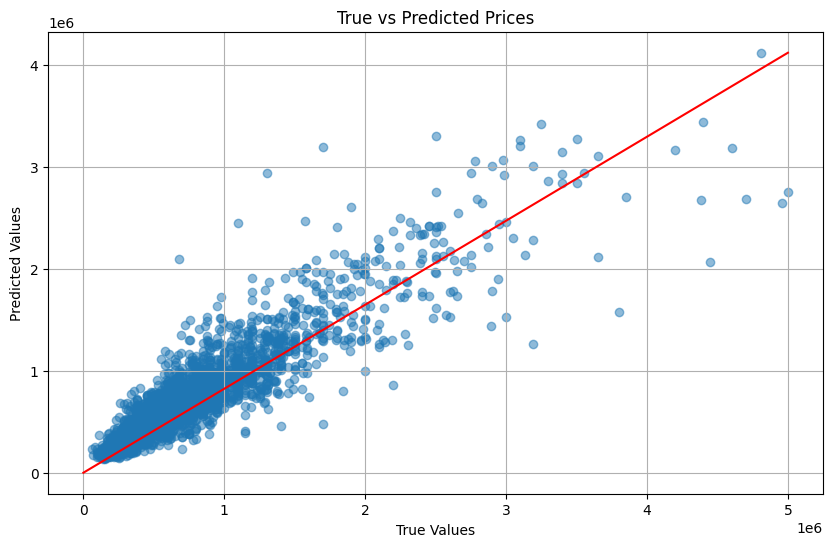

In [91]:
import matplotlib.pyplot as plt

# Reverting the log transformation to get values in the original scale
y_test_true_linear = np.expm1(y_test)
y_test_pred_linear = np.expm1(y_test_pred)

# Plotting true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_true_linear, y_test_pred_linear, alpha=0.5)
plt.plot([0, max(y_test_true_linear)], [0, max(y_test_pred_linear)], color='red')  # diagonal line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Prices')
plt.grid(True)
plt.show()


In [98]:
from sklearn.pipeline import FeatureUnion

# Combining the transformation and modeling pipelines to create the prediction pipeline
prediction_pipeline = Pipeline([
    ("transformation", final_transformation_pipeline),
    ("modeling", modeling_pipeline)
])

prediction_pipeline

Pipeline(steps=[('transformation',
                 Pipeline(steps=[('transform_condo',
                                  FunctionTransformer(func=<function transform_condo_column_final at 0x7f9302ae3520>)),
                                 ('transform_tax',
                                  FunctionTransformer(func=<function transform_tax_column_final at 0x7f9302ae1000>)),
                                 ('replace_nan',
                                  FunctionTransformer(func=<function replace_nan_in_condo_and_tax at 0x7f9302ae1d80>)),
                                 ('tra...
                                                                     'REGION_pampulha',
                                                                     'REGION_venda_nova',
                                                                     'REGION_zona_centro_sul',
                                                                     'REGION_zona_leste',
                                                                     'REGION_zona_nordeste',
                                                                     'REGION_zona_noroeste',
                                                                     'REGION_zona_norte',
                                                                     'REGION_zona_oeste',
                                                                     'LOG_AREA',
                                                                     'LOG_AVG_PRICE_PER_SQMT_BY_REGION',
                                                                     'UTILS'])),
                                 ('random_forest_regressor',
                                  RandomForestRegressor(max_depth=18,
                                                        min_samples_leaf=2,
                                                        min_samples_split=3,
                                                        n_estimators=142,
                                                        random_state=42))]))])

In [100]:
import joblib



# Exporting the pipelines to .pkl files
joblib.dump(final_transformation_pipeline, "final_transformation_pipeline.pkl")
joblib.dump(modeling_pipeline, "modeling_pipeline.pkl")


# Exporting the prediction pipeline to a .pkl file
joblib.dump(prediction_pipeline, "prediction_pipeline.pkl")

['prediction_pipeline.pkl']